# Unsupervised Learning

Instructor: Jeremy Eng

*notebook adapted from [Zain Hasan](https://drive.google.com/drive/folders/1s3irmcInqppiKI18rXIY-pnFRbSwd7jq)*

## Outline
- Machine Learning
    - Supervised vs unsupervised
- Clustering (unsupervised learning)
    - **K-means**
        - Evaluating clustering
        - Choosing number of clusters
        - Scaling prior to clustering
    - **Hierarchical clustering**
    - **DBScan**


## What is Machine Learning?

- Broadly speaking, machine learning involves using algorithms to train models that learn patterns or tendencies in data.
- Machine learning models allow computers to adjust or adapt according to the data it is given.
- This is different than conventional programming where computers follow a strict set of instructions that they are given.
- **Example**: feeding a dog
    - No ML: always feed dog at 8:00 am, 1:00 pm, and 6:00 pm.
    - ML: use data on when dog has been hungry in the past to predict the optimal times to feed dog.

There are a few different types of machine learning. We will initially just focus on **Supervised** and **Unsupervised** machine learning.

![ml types](images/MLtypes.jpg)

### Supervised learning

- Supervised learning is a technique where a certain computer program accepts inputs (features) and predicts a target variable.
    - Inputs = independent variables, target = dependent variable.
- The way this is achieved is by training an algorithm on a sample dataset.
- This sample dataset includes both inputs and the correct target values.
    - E.g. inputs = house features, output = house price
- There is a cost/penalty function which is monitored as the ML algorithm moves through the data points.
    - E.g. sum of squares in linear regression
- The algorithm tries to reduce the cost/penalty function as much as possible. 
    - Does this by tweaking weights/parameters in the model (e.g. coefficients in linear regression)
- By doing so, the model gets closer to predicting correct values.

We will cover supervised learning in the upcoming weeks!

### Unsupervised Learning 
- Involves drawing inferences from data which does not have a target variable.
- We are not trying to predict a target--instead we are trying to group data together on some similar attributes (e.g. **Clustering**)
- This is the main focus of today!

## Supervised vs Unsupervised Learning
- Supervised learning problems use data that contain a target variable (the thing they're trying to predict).
- Unsupervised learning problems do not contain a target variable.
> E.g.:
> - x-axis = study hours
> - y-axis = hours of sleep

<img src="images/SupervisedUnsupervised.png" width='700' alt="supervised vs unsupervised learning">


## Intro to Clustering

Today, we'll cover the most common unsupervised learning task: **clustering**!
- Clustering: creating groups out of data points based on point similarity
- Dividing the data into clusters can be on the basis of centroids, distributions, densities, etc

![unidentified cluster plot](images/1.PNG)

**We (humans) are pretty good at identifying patterns in data**

![k-means](images/2.PNG)

Can we develop methods for machines to do the same? 

## 1. K-Means Clustering

![grouped cluster plot](images/3.PNG)

**K-Means Clustering** is a *unsupervised* clustering machine learning algorithm. It finds clusters in data based on the data attributes alone (not the labels).

K-Means searches for cluster centers (centroids) which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

![k-means algorithm plots](images/4.PNG)

### How KMeans works - Interactive example
Go to the link and try choosing centroids to see how kmeans works visually: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/
- randomly assign initial centroids
- use packed circles for a nice demo

**Follow-up Question: Was it easy to decide clusters always?**

### <u>Some Short-comings (things to consider) of the algorithm:</u>

1. The convergence of this algorithm is not guaranteed; for that reason, scikit-learn by default uses a large number of random initializations and finds the best results.

2. Also, the number of clusters (K) must be set beforehand... there are other clustering algorithms for which this requirement may be lifted.
    - We will see other algorithms that do not need this specification

#### Let's give it a try

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans   #<---- We will use sci-kit learns implementation of K-means
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

ModuleNotFoundError: No module named 'numpy'

### Generate data to cluster

In [2]:
from sklearn.datasets import make_blobs #used to generate some fake data

X, y = make_blobs(
    n_samples = 3000,  # number of datapoints to generate
    centers = 4, # How many cluster centers
    cluster_std  = 0.60, # Standard deviation for each cluster
    random_state = 0 # Set seed so clusters are same for everyone
)

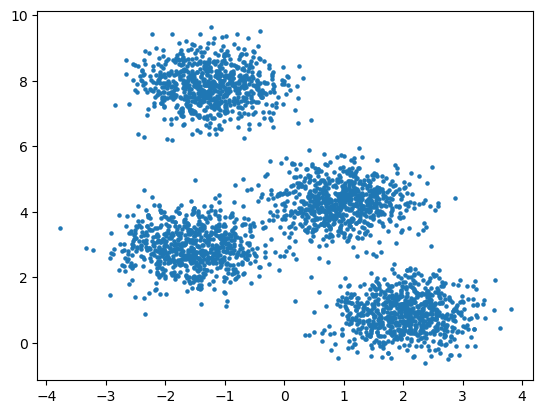

In [3]:
# inspect the generated data
plt.scatter(X[:,0], X[:,1], s=5)

#### Build model for prediction
There are 4 clusters, so we will build a model for 4 clusters.
- In reality, we usually don't have a great idea on how many clusters to use without doing some analysis.

In [5]:
model = KMeans(4) #instatiating

Train the model off of our inputs

In [6]:
model.fit(X)   #This is where the K-means algorithm is iterating

: 

: 

Predict the clusters for each observation

In [6]:
y_pred = model.predict(X)
y_pred #each data point gets a predicted cluster number (0, 1, 2, or 3 in this case)

array([0, 1, 2, ..., 0, 0, 2])

In [7]:
print(model.cluster_centers_) #centroids

[[-1.24993275  7.84646637]
 [ 2.01461578  0.89698901]
 [-1.55247435  2.91913877]
 [ 0.96531474  4.28859914]]


Finally, let's plot the predicted clusters along with their centroids

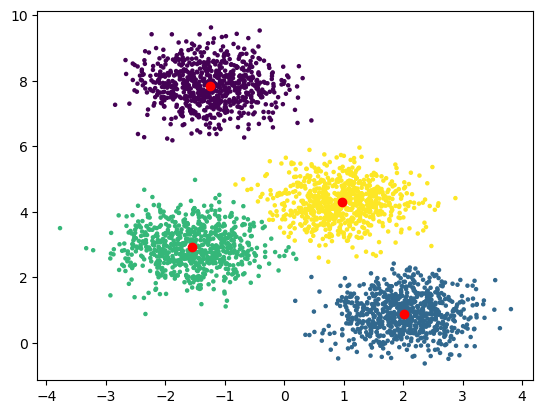

In [8]:
plt.scatter(X[:,0], X[:,1], c=y_pred, s=5) #have color (c) represent the predictions (y_pred)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red') #print the centroids model.cluster_centers_

### Choosing K (the number of clusters)

In the previous example, we had a pretty good idea of how many clusters to use (what value of K to use). In practice, especially with high-dimensional data where we can't visualize our data efficiently, we usually don't know the number of clusters to use. There are a few popular techniques that are used to try and determine an optimal value of K prior to clustering.

#### Elbow method
- Since we want to know what is the best number of clusters, we try different values for K.
- For example, we could try all the integer values between 1 and the square root of the number of observations of the dataset.
- At each iteration, we could record the so-called **inertia**.
- **Inertia** is the sum of squared distances between each point and the center of the cluster it belongs to.
- Thus, it makes sense to expect that inertia gets smaller as K increases.
- In fact, as there are more clusters, each cluster is smaller, so each point is closer to the center of its cluster.
- Eventually, when K equals the number of data points, inertia is necessarily zero.

Let's look at example of using the elbow method. We will create some dummy data (where we know the number of clusters during generation), but let's pretend we don't. How could we determine an optimal value for K? The elbow method is one option.

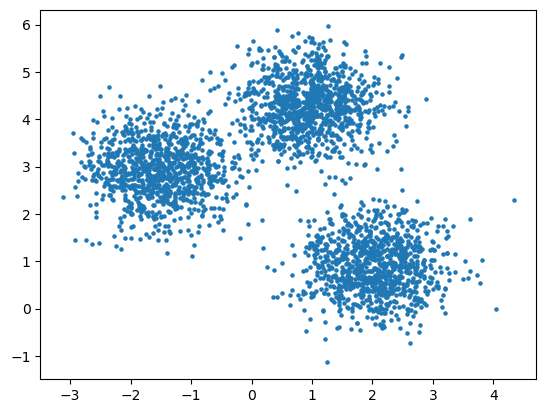

In [5]:
#generate some fake data
X, y = make_blobs(
    n_samples = 3000,  # number of datapoints to generate
    centers = 3, # How many cluster centers
    cluster_std  = 0.60, # Standard deviation for each cluster
    random_state = 0 # Set seed so clusters are same for everyone
)

#plot it
plt.scatter(X[:,0], X[:,1], s=5)
plt.show()

In [6]:
inertias = []
K = range(1,11) #run K-means with K ranging from 1 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    inertias.append(kmeanModel.inertia_)

: 

: 

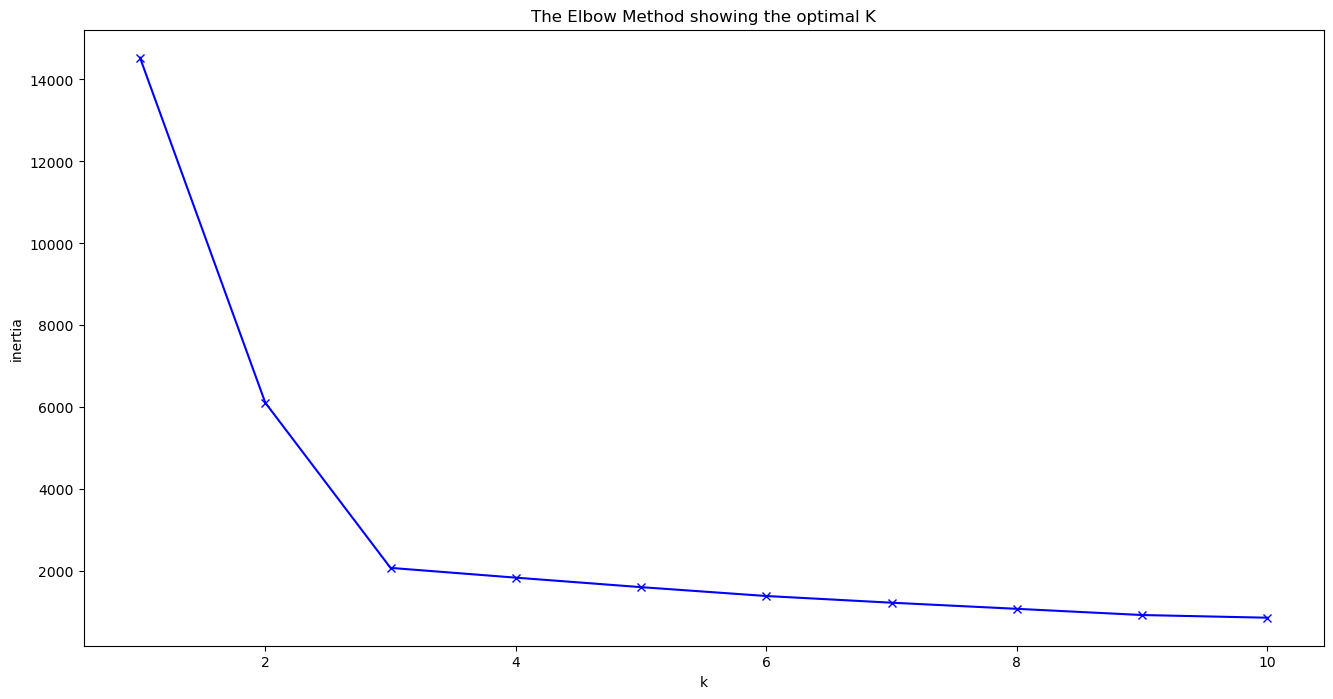

In [11]:
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

- Notice that as the number of clusters increases, the intertia goes down (as expected).
- We can also see that by reaching 3 clusters, the inertia is pretty low, and if we try to add another cluster (4th cluster), the inertia doesn't go down that much (relatively).
- That point in a plot is called the **elbow** and is the point we wanted to find as an optimal number of clusters.

#### Silhouette Coefficient
- There are other metrics besides inertia that measure how well defined our clusters are defined (without ground truth labels). 
- Another popular metric is the **Silhouette Coefficient**.
- Unlike inertia, a **higher** Silhouette Coefficient relates to a model with better defined clusters.
- The Silhouette Coefficient ranges from -1 to 1.
- Silhouette Coefficient = $\dfrac{b-a}{\max(a,b)}$, where:
    - $a$ = average intra-cluster distance i.e the average distance between each point within a cluster
    - $b$ = average inter-cluster distance i.e the average distance between all clusters.
- So the main difference is that the Silhouette Coefficient is effected by how far away clusters are from each other.
- We can create a similar plot to an elbow plot, with K (number of clusters) on the x-axis, but now the Silhouette Coefficient on the y-axis.

In [12]:
from sklearn.metrics import silhouette_score

silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    label=kmeanModel.predict(X)
    silhouettes.append(silhouette_score(X,label))

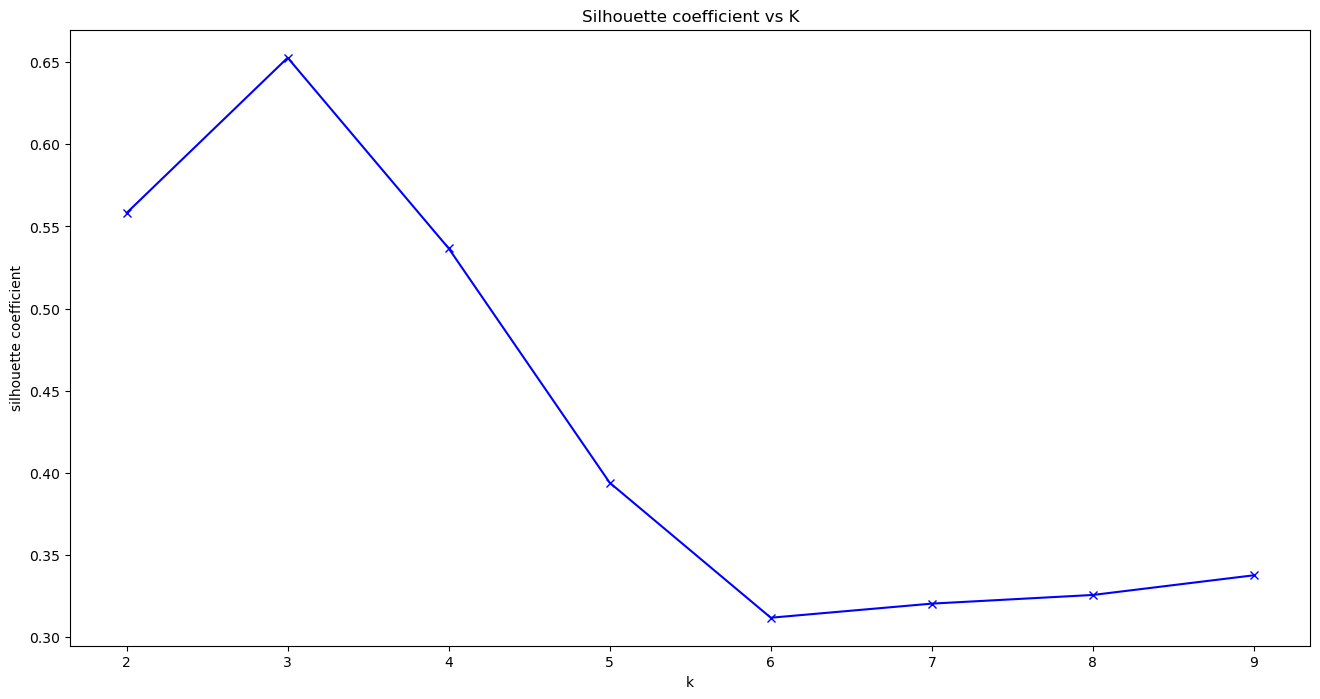

In [13]:
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

#### Other clustering metrics

There are other metrics you can use as well (besides inertia and the silhouette coefficient). See this [resource](https://towardsdatascience.com/are-you-still-using-the-elbow-method-5d271b3063bd) for a nice comparison of a bunch of clustering metrics. Some seem to work better than others in different situations (refer to resource for more info).

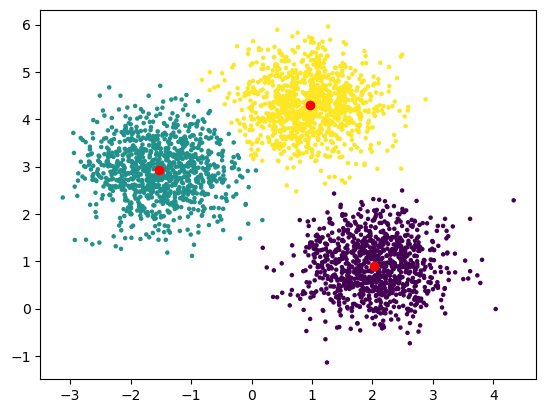

In [14]:
#finish off example by actually performing clustering
model = KMeans(n_clusters=3)
model.fit(X)

y_pred = model.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, s=5) #have color (c) represent the predictions (y_pred)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red') #print the centroids model.cluster_centers_

---
### Real Data Example: Clustering on the Linnerud Dataset

In [1]:
from sklearn.datasets import load_linnerud
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid', context='talk')

data = load_linnerud()
df = pd.DataFrame(data.data, columns=data.feature_names)
df = df[['Chins','Situps']]
df.head()

,Chins,Situps
0,5.0,162.0
1,2.0,110.0
2,12.0,101.0
3,12.0,105.0
4,13.0,155.0


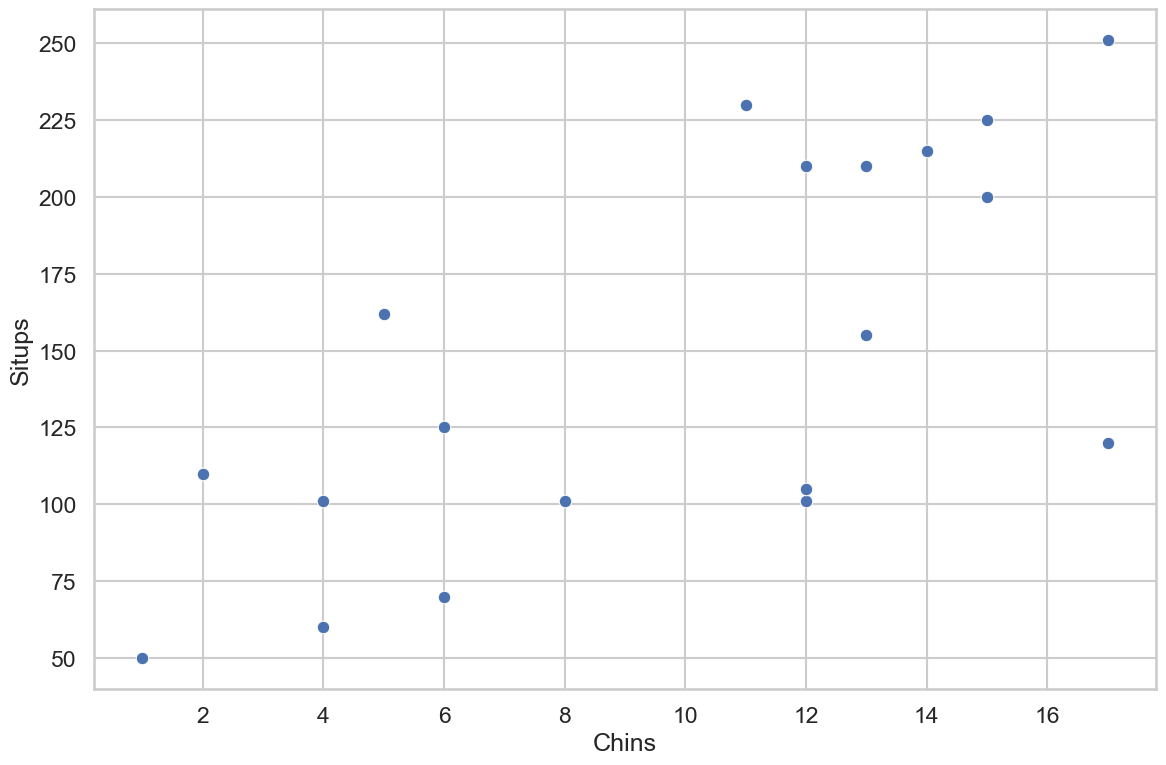

In [5]:
#Visualize Chin-up and sit-up Columns
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=df['Chins'], y=df['Situps'], data=df, ax=ax)

fig.tight_layout()

In [6]:
#elbow method
inertias = []
K = range(1,11) #run K-means with K ranging from 1 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    inertias.append(kmeanModel.inertia_)
    
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

: 

: 

In [1]:
silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    label=kmeanModel.predict(df)
    silhouettes.append(silhouette_score(df,label))
    
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

NameError: name 'KMeans' is not defined

In [19]:
#Create Model
model = KMeans(4)

# Train model
model.fit(df)

# Make predictions
y_pred = model.predict(df[['Chins', 'Situps']])
y_pred

array([3, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0])

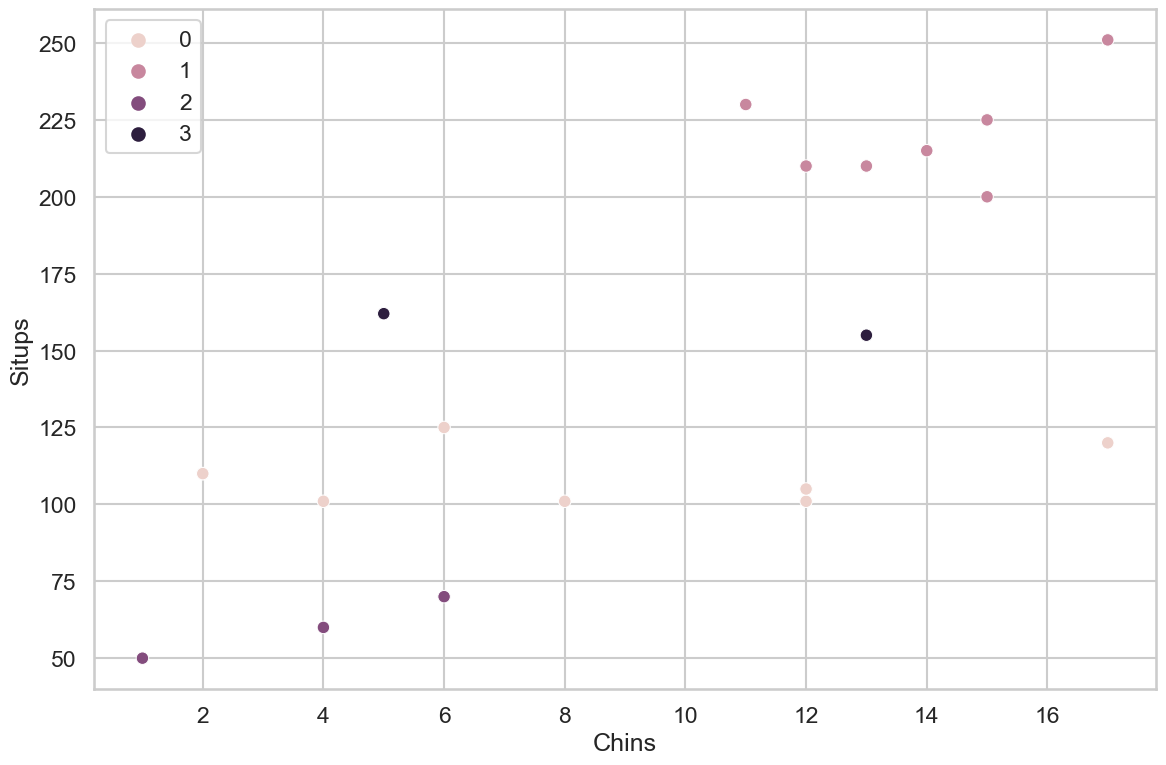

In [20]:
#Visualize Results
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='Chins', y='Situps', hue=y_pred, data=df, ax=ax)

fig.tight_layout()

### Bad results?
Hmmm, seems like our K-means clustering didn't do a great job... any ideas why?

## Scaling prior to clustering
Scaling data prior to clustering is **extremely** important because clustering usually involves calculating distances. Columns in our data that contain values much larger than others will have an improportional effect on the clustering.

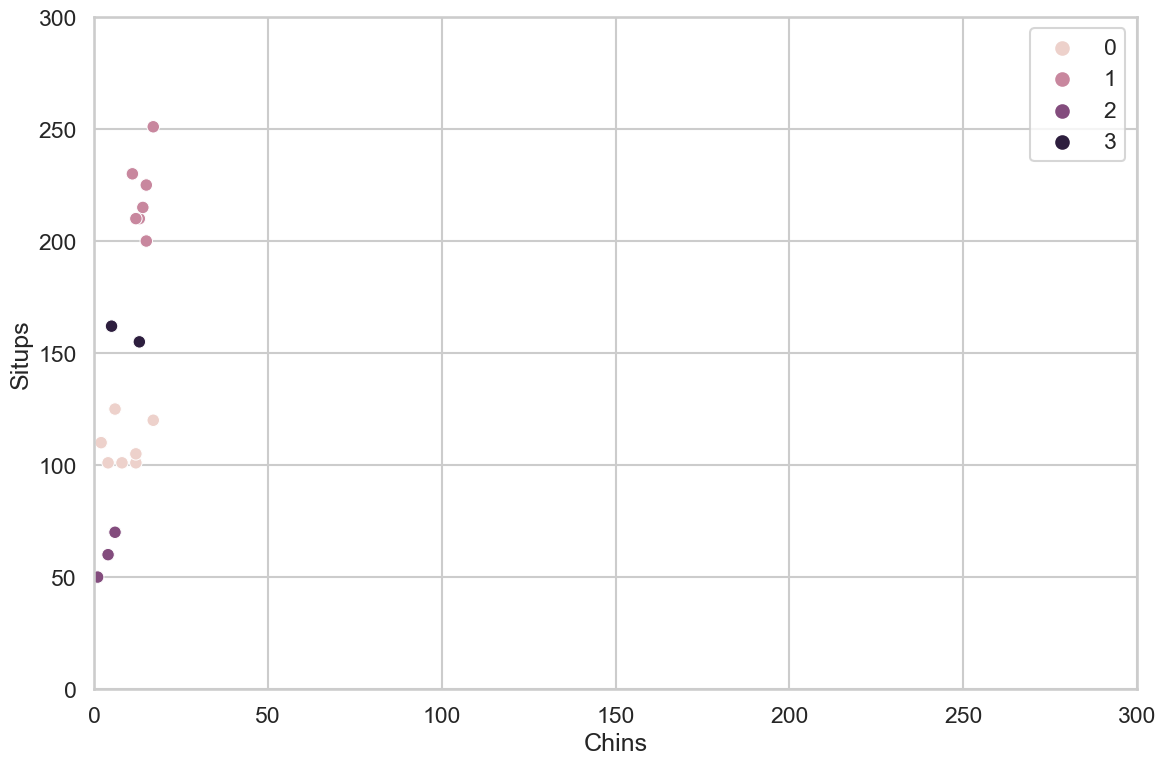

In [21]:
#Visualize Results again, but now with same axes ranges.
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='Chins', y='Situps', hue=y_pred, data=df, ax=ax)

plt.ylim(0,300)
plt.xlim(0,300)

fig.tight_layout()

In [22]:
# perform scaling prior to clustering
#perform scaling, then clustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)
df_scaled.head()

,Chins,Situps
0,-0.863671,0.269750
1,-1.445921,-0.582956
2,0.494912,-0.730539
3,0.494912,-0.664946
4,0.688996,0.154963


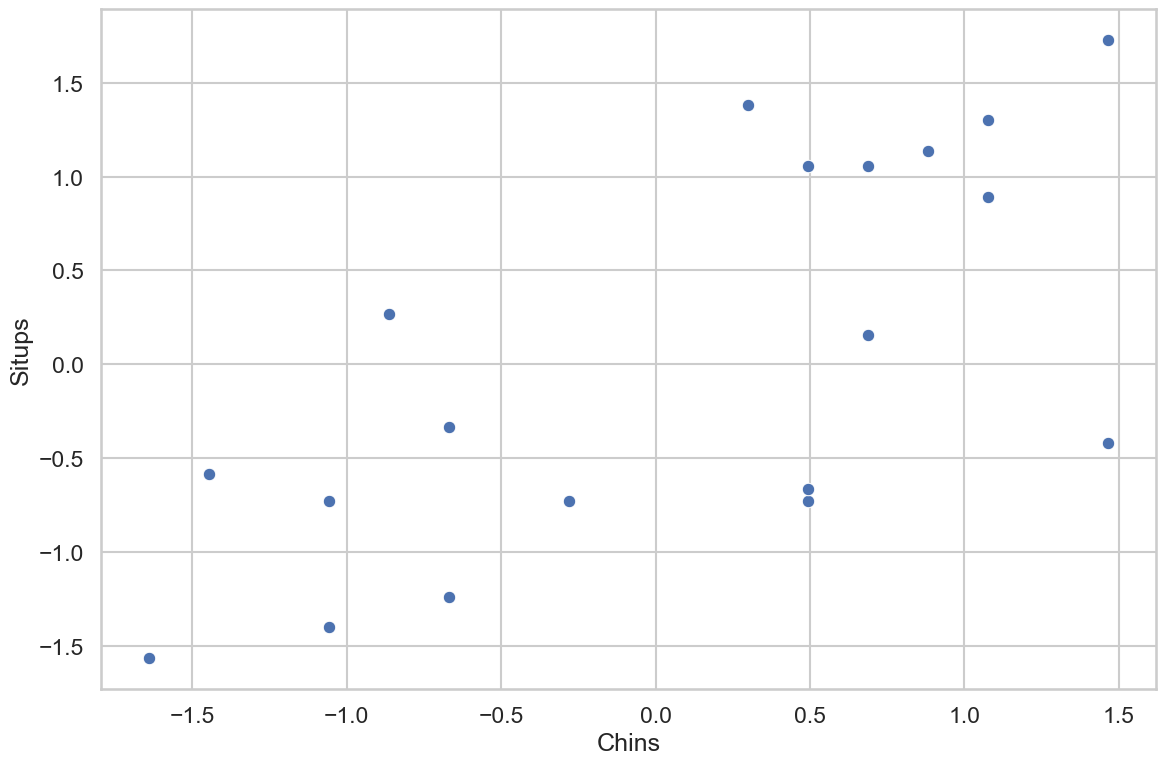

In [23]:
#Visualize scaled data
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='Chins', y='Situps', data=df_scaled, ax=ax)

fig.tight_layout()

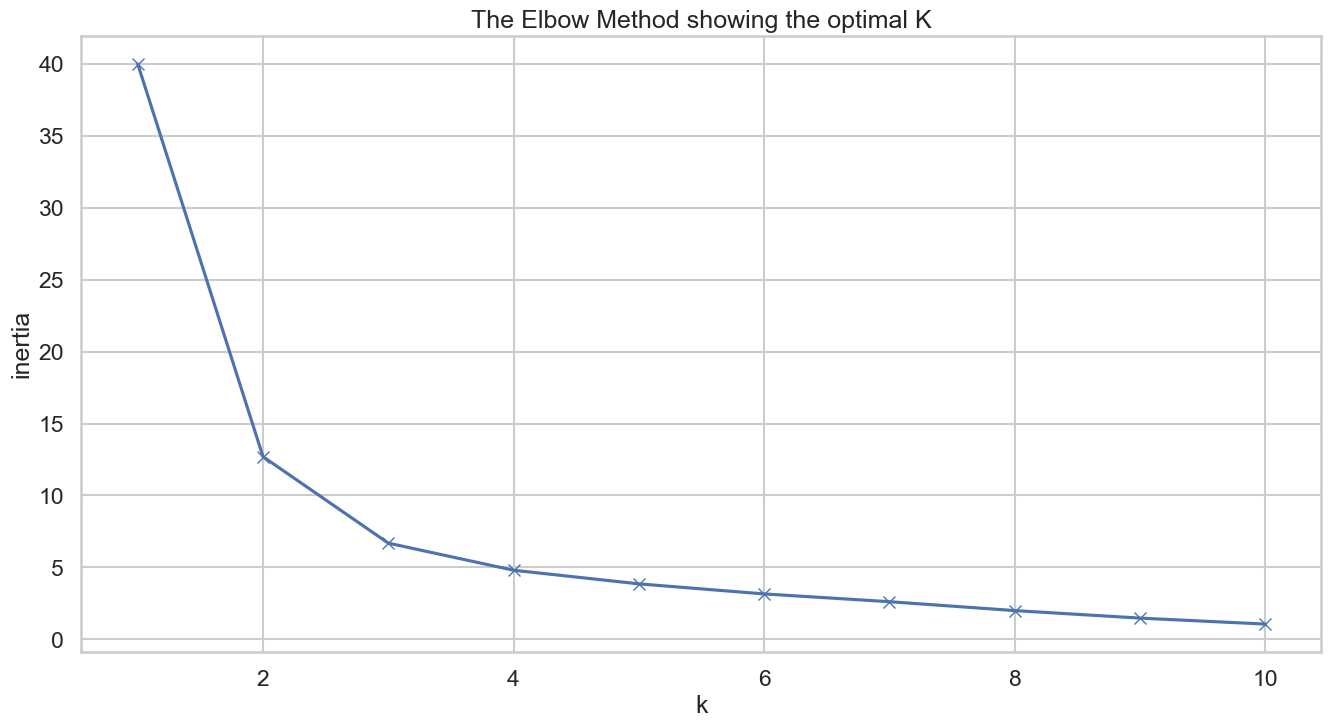

In [24]:
#elbow method with scaled data
inertias = []
K = range(1,11) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    inertias.append(kmeanModel.inertia_)
    
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

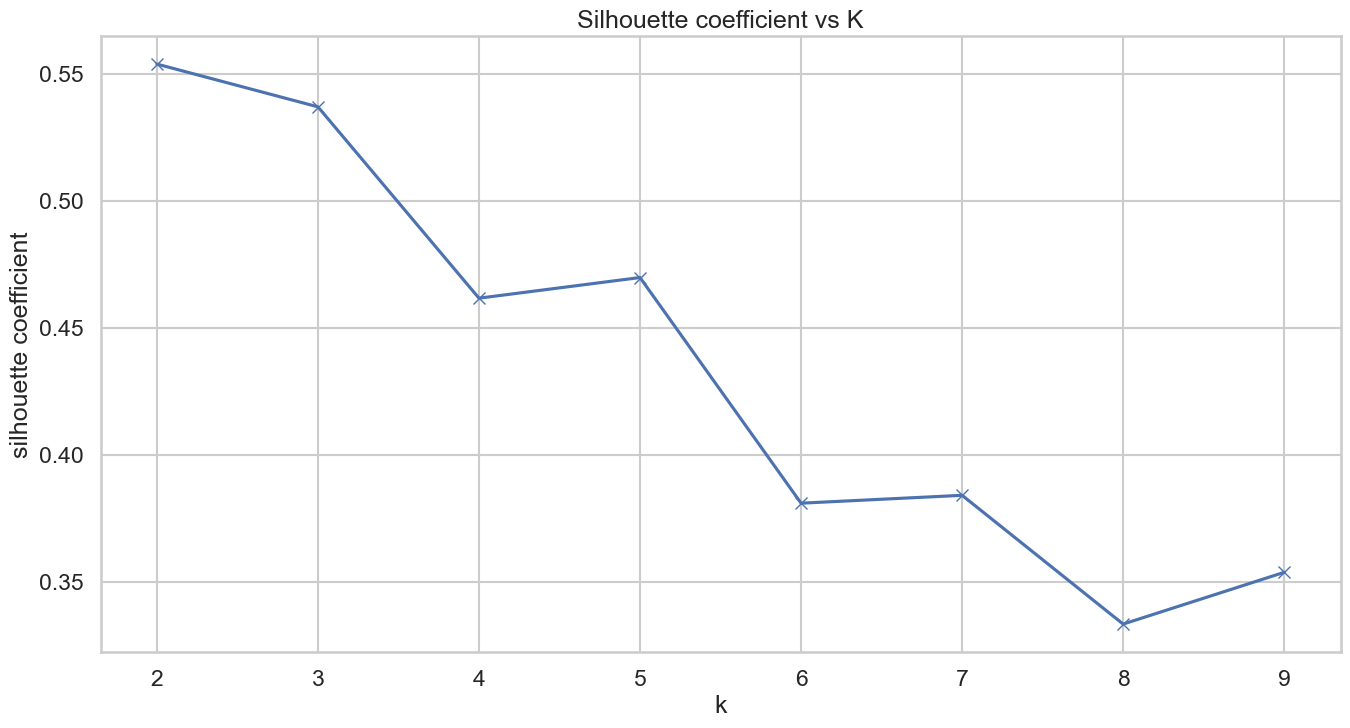

In [25]:
silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    label=kmeanModel.predict(df_scaled)
    silhouettes.append(silhouette_score(df_scaled,label))
    
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [26]:
#Create Model
model = KMeans(2)

# Train model
model.fit(df_scaled)

# Make predictions
y_pred = model.predict(df_scaled[['Chins', 'Situps']])
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0])

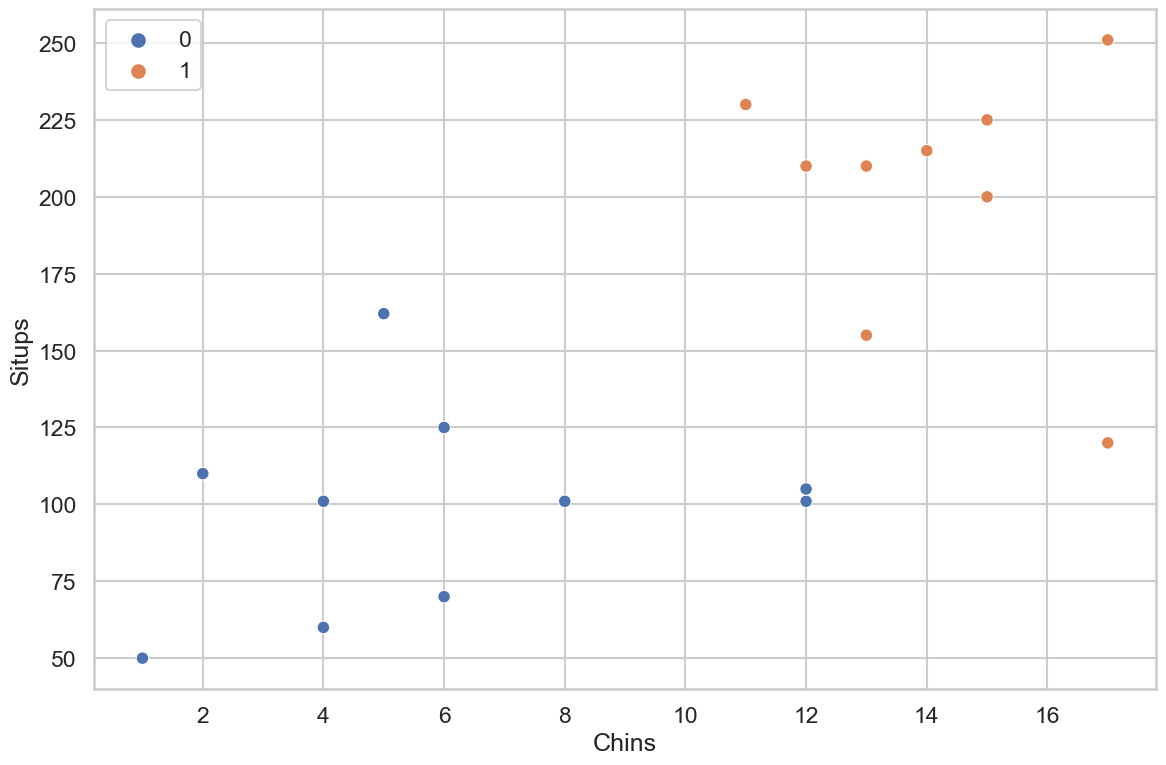

In [27]:
#Visualize Results
fig, ax = plt.subplots(figsize=(12, 8))

#notice original data is plotted, but cluster labels came from scaled data
sns.scatterplot(x='Chins', y='Situps', hue=y_pred, data=df, ax=ax) 

fig.tight_layout()

## 2. Hierarchical  Clustering

[source: Toward Data Science](https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019)

#### Algorithm: 
<img src="images/singlelink1.jpg"/>
<img src="images/singlelink2.jpg"/>

The result of this process can be visualized as a **dendrogram**.

<img src="images/dendogram1.jpg"/>
In the dendrogram, each leaf corresponds to one object. As we move
up the tree, objects that are similar to each other are combined into branches, which
are themselves fused at a higher height.

The height of the fusion, provided on the vertical axis, indicates the dis-similarity or **distance**
between two clusters. The higher the height of the fusion, the less similar the
objects.

One of the problems with hierarchical clustering is that, it does not tell us where to cut the dendrogram to form clusters.

We can use a dendrogram to visualize the history of groupings and figure out the optimal number of clusters.

1. Determine the largest vertical distance that doesn’t intersect any of the other clusters
    - Distance between A and B in the diagram below.
2. Draw a horizontal line at both extremities
    - A and B
3. The optimal number of clusters is equal to the number of vertical lines going through the horizontal line

E.g., in the below case, best choice for number of clusters will be 4.
<img src="images/dendogram1.jpg"/>

#### Linkage Criteria
- How are you going to calculate distance between two smallest clusters and group them based on min distance
- There isnt a single way to do this

<img src="images/linkage.png"/>

## Toy Example

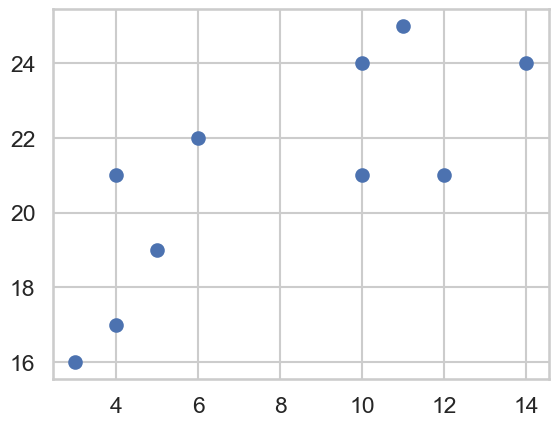

In [28]:
# create some fake data
x1 = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
x2 = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

# visualize the fake data
plt.scatter(x1, x2)
plt.show()

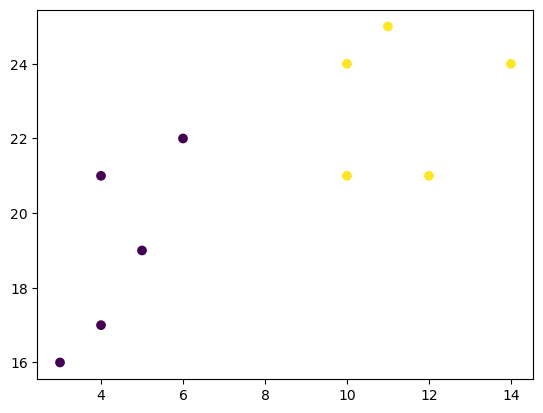

In [29]:
from sklearn.cluster import AgglomerativeClustering

# turn data into a list of points
data = list(zip(x1,x2))

# perform hierarchical clustering with two clusters
hierarchical_cluster = AgglomerativeClustering(n_clusters=2)
cluster_labels = hierarchical_cluster.fit_predict(data)

plt.style.use('default')

#visualize results
plt.scatter(x1, x2, c=cluster_labels)
plt.show()

To visualize the cluster result as a dendrogram, we will use Scipy's [```linkage```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function to first compute the linkage matrix (performs clustering again) and then use it to create the dendrogram.

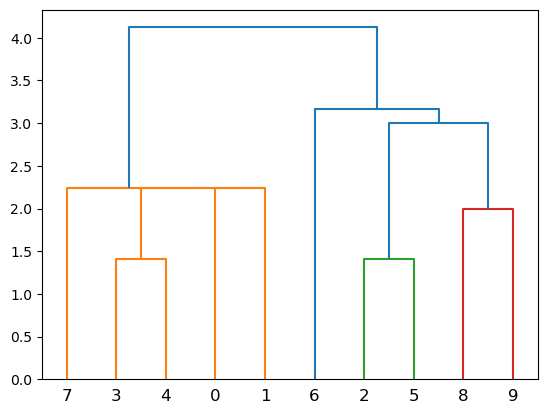

In [30]:
from scipy.cluster.hierarchy import linkage, dendrogram

#plot dendrogram
linkage_matrix = linkage(data)
dendrogram(linkage_matrix)

plt.show()

## Hierarchical clustering Demo using <code>iris</code> dataset
<img src="images/iris.jfif" width="750"/>

In [31]:
from sklearn import datasets

iris = datasets.load_iris()

# check out the first 10 observations
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [32]:
# checkout the targets but we won't use them while clustering
iris.target #hidden

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Now let's compare models when under different linkage criteria

In [33]:
# Hierarchical clustering
# single
single = AgglomerativeClustering(n_clusters=3, linkage="single")
single_pred = single.fit_predict(iris.data)

# complete
complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
complete_pred = complete.fit_predict(iris.data)

# average
avg = AgglomerativeClustering(n_clusters=3, linkage="average")
avg_pred = avg.fit_predict(iris.data)

Since we know the ground truth labels, we can examine our clustering result by seeing how well our assigned clusters match the true labels. We can use a metric such as the **adjusted_rand_score** which results in a score between -1 and 1, where 1 means the assigned clusters and the true labels are identical.

> Note: in practice, clustering is done on data where we don't know the "true" labels on the data. In general, it is difficult to evaluate clustering performance (when we don't have ground truth labels); however, we can use metrics like the inertia and Silhouette Score that we saw earlier in this notebook.

In [34]:
from sklearn.metrics import adjusted_rand_score

single_ar_score = adjusted_rand_score(iris.target, single_pred)
complete_ar_score = adjusted_rand_score(iris.target, complete_pred)
avg_ar_score = adjusted_rand_score(iris.target, avg_pred)

print( "Scores: \nSingle:", single_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Single: 0.5637510205230709 
Complete:  0.6422512518362898 
Average:  0.7591987071071522


In [35]:
# Pretend we don't know the actual labels (iris.target) and use the silhouette score instead to judge clustering
single_silhouette = silhouette_score(iris.data, single_pred)
complete_silhouette = silhouette_score(iris.data, complete_pred)
avg_silhouette = silhouette_score(iris.data, avg_pred)

print( "Scores: \nSingle:", single_silhouette,"\nComplete: ", complete_silhouette, "\nAverage: ", avg_silhouette)

Scores: 
Single: 0.5121107753649307 
Complete:  0.5135953221192214 
Average:  0.5541608580282851


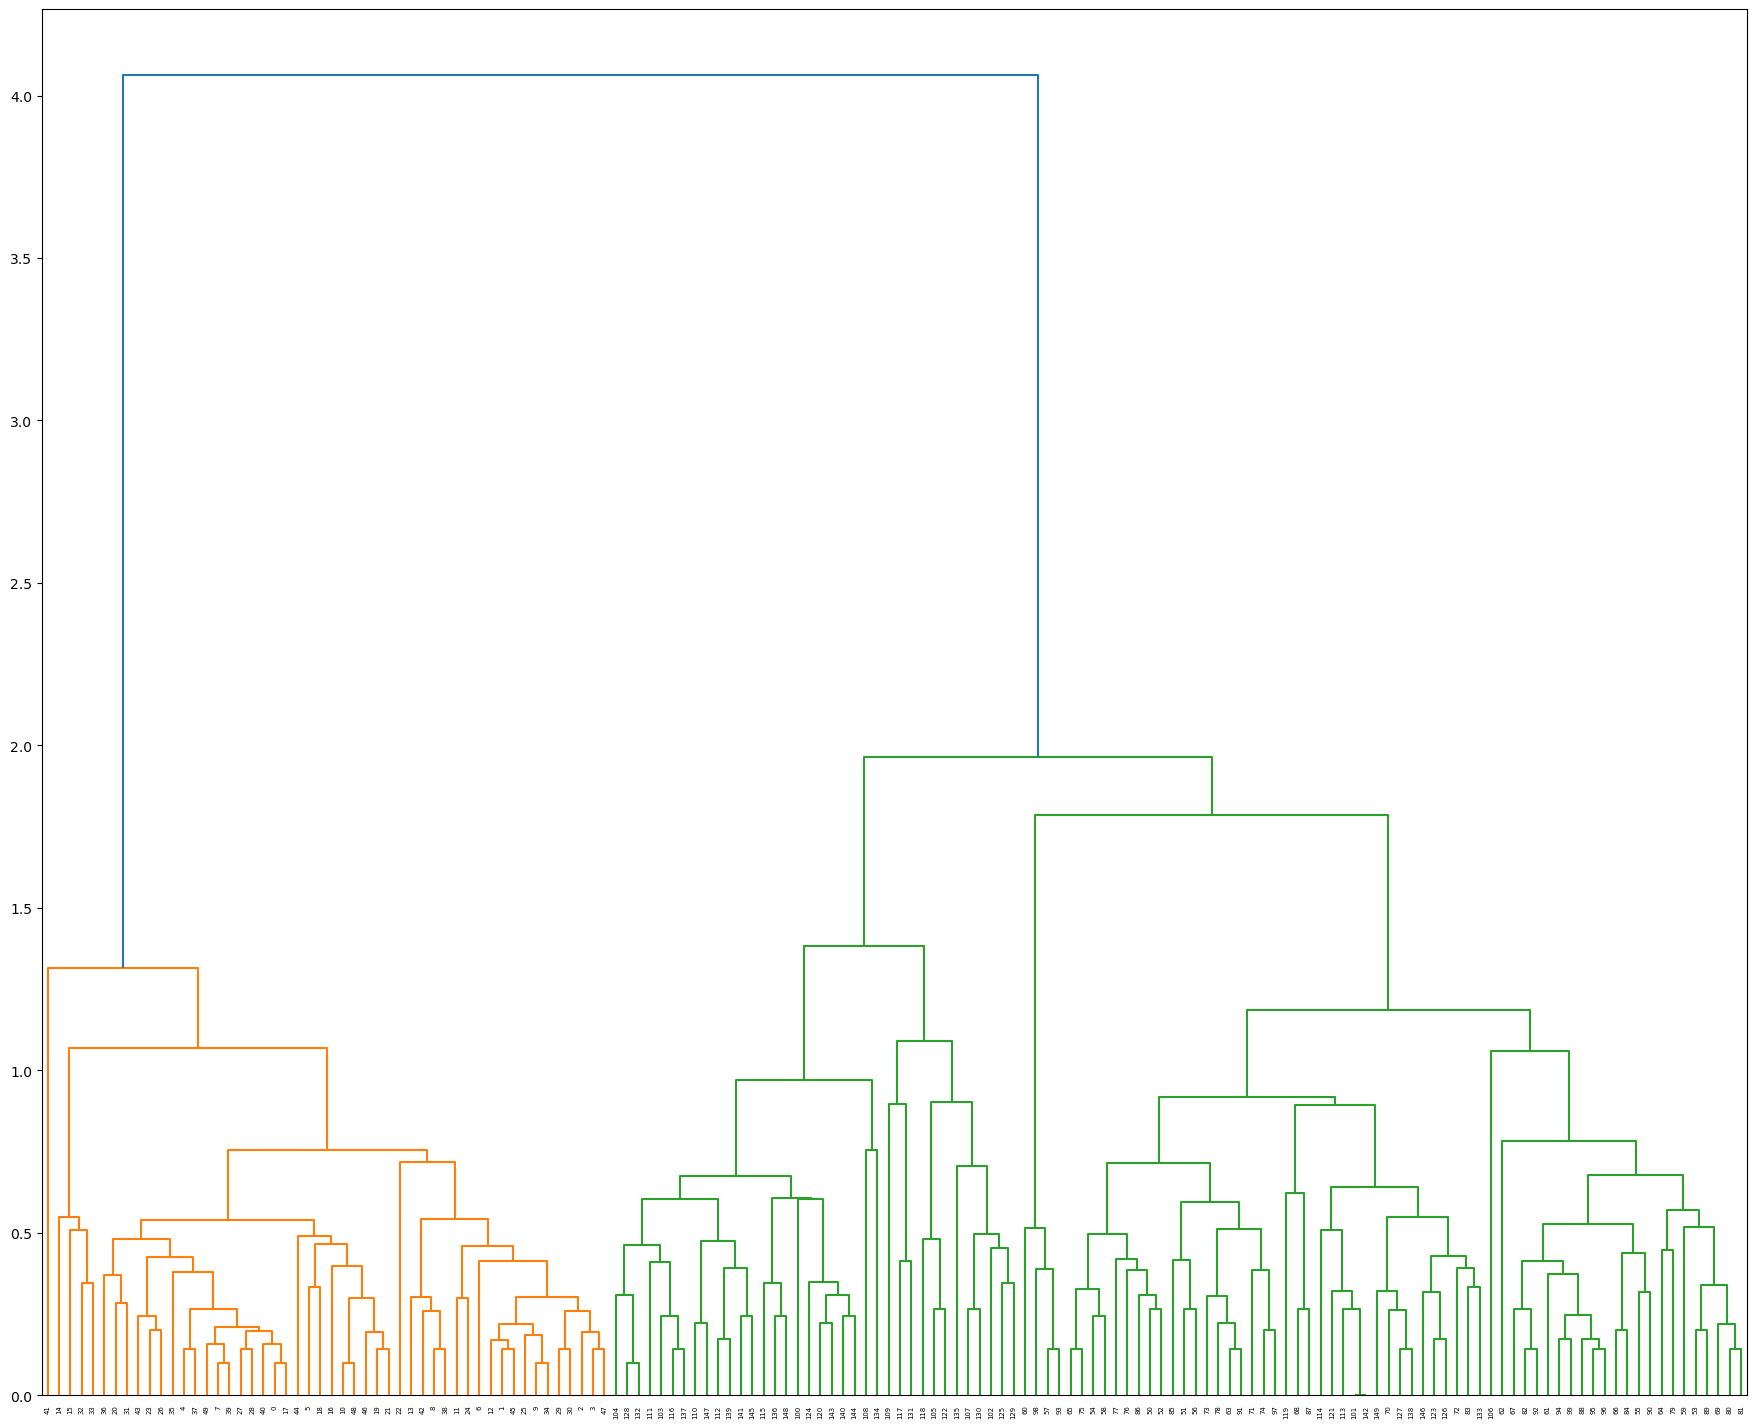

In [36]:
# Specify the linkage type. Scipy accepts 'single', 'complete', 'average', as well as other values
# Pick the one that resulted in the highest Adjusted Rand Score from above
linkage_type = 'average'

linkage_matrix = linkage(iris.data, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'

plt.show()

So even though we cheated and knew ahead of time that there were truly 3 groups of flowers, based on the four features in the data, two clusters might actually be better in segmenting the data (our flower measurements)!

## 3. DBScan (Density-Based Spatial Clustering of Applications with Noise)

## What does DBScan allows us to do?

<img src='images/dbscanmotivation.PNG' width="800"/>

K-means clustering works best when clusters are spherical. However, we can have non-spherical clusters, such as nested clusters.

<img src='images/algo_comparison.png' width="500"/>



### How DBScan Works


<img src='images/DB1.png' width=400/>

- Let **R** be a parameter specifying the radius of a neighborhood around some point.
- Let **M** be minimum number of points we want in a neighbourhood to define a cluster.

Basic Algorithm
1. Classify each point as either a **core point**, **border point**, or **outlier** according to the following:
    - A point is a **core point** if at least **M** points (including itself) are within distance **R** of it.
    - A point is a **border point** if it is not a core point, but it is near a core point (inside a core points radius).
    - A point is an **outlier** if it is not a core point and not near a core point (all remaining points).

<img src='images/DB2.png' width=400/>


2. Pick a random core point and assign it to cluster 1.
<img src='images/DB3.png' width=400/>

3. For each core point in cluster 1 (right now just the original core point), add all core points that are in its neighborhood.
<img src='images/DB4.png' width=400/>

4. Repeat this until there are no more core points to add to cluster 1.
5. For each core point, add any border points that are in its neighborhood into cluster 1.
<img src='images/DB5.png' width=400/>

6. From the remaining core points, randomly choose one and assign it to cluster 2.
<img src='images/DB6.png' width=400/>

7. Repeat steps 3, 4, and 5 for cluster 2.
<img src='images/DB7.png' width=400/>
<img src='images/DB8.png' width=400/>

8. Continue repeating this process (creating more clusters) until there are no unassigned core points remaining.
9. Remaining points are outliers.





### Advantages of DBScan
<img src='images/DBScanPros.PNG' width=600 />

## Interactive Demo: 
- https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

<img src='images/dbscansmile.PNG' />

In [37]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs

# #############################################################################
# Generate sample data (two dimensional)
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
X = StandardScaler().fit_transform(X)
X.shape

(750, 2)

In [38]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(X) #algorithm runs

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
#core_samples_mask will be True if the data point was a core point. Otherwise false.

labels = db.labels_
#actual cluster label. If outliers, gets assigned -1

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) #number of unique clusters labels (excluding -1)
n_noise_ = list(labels).count(-1) #counts how many outliers there are (labels with -1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


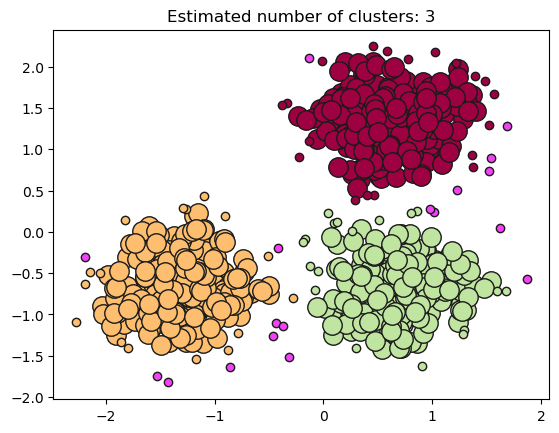

In [39]:
# Plot result
# color represents cluster label
# core_samples_mask is used to make core points bigger (markersize=14) than non-core points (markersize=6)

import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

# print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [242/255, 66/255, 245/255, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.rcParams["figure.figsize"] = (20, 10)
plt.show()

## Reminder: Scale prior to clustering!
Scaling data prior to clustering is extremely important because clustering usually involves calculating distances. Columns in our data that contain values much larger than others will have an improportional effect on the clustering.

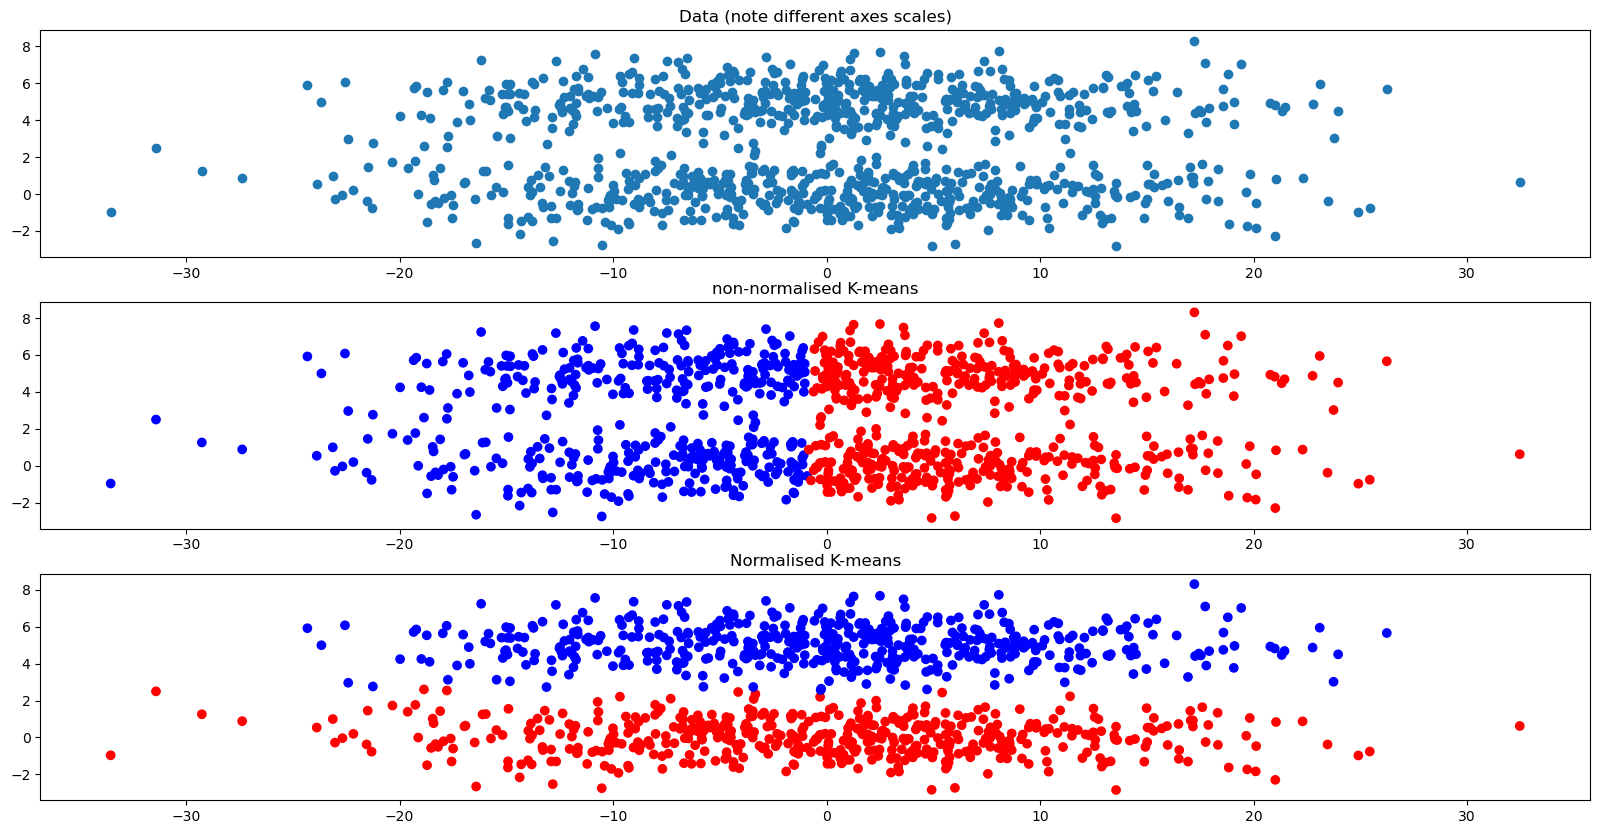

In [40]:
# Demo of clustering without scaling vs with scaling

rnorm = np.random.randn

#generate data
# random standard normal sample x 10 of 1000 data points
x = rnorm(1000) * 10

#500 standard random normal samples, and 500 standard random normal samples +5
y = np.concatenate([rnorm(500), rnorm(500) + 5])

#plot data
fig, axes = plt.subplots(3, 1)

#plot raw data
axes[0].scatter(x, y)
axes[0].set_title('Data (note different axes scales)')


#perform clustering without scaling
km = KMeans(2)
clusters = km.fit_predict(np.array([x, y]).T)

#plot clustering results without scaling
axes[1].scatter(x, y, c=clusters, cmap='bwr')
axes[1].set_title('non-normalised K-means')


#perform scaling, then clustering
scaler = StandardScaler()
data = np.array([x, y]).T
data = scaler.fit_transform(data)
clusters = km.fit_predict(data)

#plot clustering results with scaling
axes[2].scatter(x, y, c=clusters, cmap='bwr')
axes[2].set_title('Normalised K-means')

plt.show()